<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_3_2R%C3%A9gressions_R%C3%A9gularis%C3%A9es_Ridge_Exercice_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [0]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

In [0]:
y = pd.DataFrame(boston.target, columns=["prices"])
y.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = pd.DataFrame(sc_fit.transform(X_train))
X_test = pd.DataFrame(sc_fit.transform(X_test))

X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.016513,0.188616,-0.067192,0.018186,0.038145,0.026525,-0.016625,0.051545,0.025560,-0.043819,-0.042679,0.028619,-0.009867
std,0.960514,1.117568,0.973651,1.034038,1.075383,0.964732,1.018639,1.067966,1.024674,1.000577,1.028121,1.001924,0.989780
min,-0.409537,-0.450148,-1.524568,-0.269680,-1.487055,-3.015642,-2.351277,-1.277004,-0.981566,-1.320410,-2.741003,-3.897317,-1.493033
25%,-0.400797,-0.450148,-0.916117,-0.269680,-0.930725,-0.501407,-0.845438,-0.820720,-0.634439,-0.793623,-0.516258,0.221685,-0.802311
50%,-0.378073,-0.450148,-0.229529,-0.269680,-0.135969,-0.086593,0.340656,-0.216613,-0.518730,-0.602199,0.077784,0.402757,-0.200940
75%,0.030991,0.452983,0.987374,-0.269680,0.952405,0.550769,0.906909,0.800307,1.679744,1.516823,0.799953,0.449505,0.548767
max,8.039405,3.563769,2.079838,3.708099,2.804629,3.415730,1.117690,3.308312,1.679744,1.516823,1.638600,0.449505,3.531539


4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
linear_regressor = LinearRegression()
ridge_regressor_small_alpha = Ridge(alpha = 0.01)
ridge_regressor_large_alpha = Ridge(alpha = 100)

5. Entraînez ces modèles sur les données sur les données d’apprentissage

In [0]:
linear_regressor.fit(X_train, y_train)
ridge_regressor_small_alpha.fit(X_train, y_train)
ridge_regressor_large_alpha.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

6. Produisez les scores de performance de c’est trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

In [0]:
print("Linear Regression score : {}".format(linear_regressor.score(X_test, y_test)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_test, y_test)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_test,y_test)))

Linear Regression score : 0.6824395245128735
Ridge with small Alpha score : 0.6824416565240421
Ridge with large Alpha score : 0.6674538584979144


7. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

In [0]:
linear_regressor.coef_[0]

array([-0.96263421,  1.15284935,  0.30664493,  0.59018962, -2.06780644,
        2.86934524,  0.0648878 , -3.07975352,  2.42694157, -2.13143251,
       -2.1369742 ,  0.85142805, -3.7441575 ])

In [0]:
coef = pd.DataFrame() # on créé un dataframe pour analyser les coefficients
coef['features'] = boston_df.columns
coef['coef_linear_regressor'] = linear_regressor.coef_[0]
coef['coef_abs_linear_regressor'] = np.abs(linear_regressor.coef_[0])
coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_[0]
coef['coef_abs_ridge_small_alpha'] = np.abs(ridge_regressor_small_alpha.coef_[0])
coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_[0]
coef['coef_abs_ridge_large_alpha'] = np.abs(ridge_regressor_large_alpha.coef_[0])
coef.head()

,features,coef_linear_regressor,coef_abs_linear_regressor,coef_ridge_small_alpha,coef_abs_ridge_small_alpha,coef_ridge_large_alpha,coef_abs_ridge_large_alpha
0,CRIM,-0.962634,0.962634,-0.962516,0.962516,-0.655683,0.655683
1,ZN,1.152849,1.152849,1.152625,1.152625,0.595627,0.595627
2,INDUS,0.306645,0.306645,0.306272,0.306272,-0.376809,0.376809
3,CHAS,0.590190,0.590190,0.590257,0.590257,0.718568,0.718568
4,NOX,-2.067806,2.067806,-2.067396,2.067396,-0.810717,0.810717


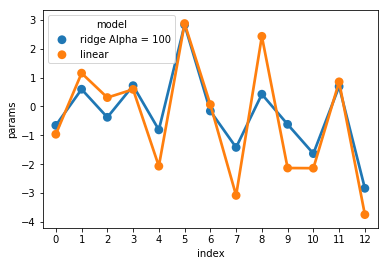

In [0]:
perf_ridge_large_alpha = pd.DataFrame({"params": ridge_regressor_large_alpha.coef_[0], 
                                       "model": "ridge Alpha = 100", 
                                       "index": range(0, len(boston_df.columns))})

perf_lin = pd.DataFrame({"params": linear_regressor.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(boston_df.columns))})

perf_compar = pd.concat([perf_ridge_large_alpha,perf_lin])

import seaborn as s
s.pointplot(x = 'index',y = 'params',hue = 'model', data = perf_compar)

---> On remarque qu'on a pu pénaliser le coefficient lié à la Feature NOX pour en limiter son impact

8. Déterminez la valeur optimale de alpha (à 1 prêt) à l'aide de la fonction GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':np.arange(0,100,1)}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
grid_fit.best_params_

# donc il me dit que alpha = 2 est le meilleur parametre pour optimisier mon modele 

{'alpha': 15}

In [0]:
grid_fit.best_estimator_.score(X_test,y_test)

# il me recalcule le score du modele avec le alpha = 2

0.6825433527413425

In [0]:
Ridge(alpha=0).fit(X_train,y_train).score(X_test,y_test)

# il recalcule le score pour le modele lineaire (alpha = 0) pour le comparer avec le modele (alpha =2)

0.7149625810590897

le modele avec (alpha = 2) est mieux que l'autre de (alpha = 0)

AttributeError: ignored